<a href="https://colab.research.google.com/github/Joyfull-Joyal/sign_language_interprter_Main-Project/blob/Yolov8/Yolov8_class_3_epoch_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 10.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
model = YOLO('yolov8n-seg.yaml')
model = YOLO('yolov8n-seg.pt')

In [ ]:
%cat /content/drive/MyDrive/Data/dataset.yaml

train: /content/drive/MyDrive/Data/train
val: /content/drive/MyDrive/Data/val
nc: 3
names: ["A", "I", "L"]

In [ ]:
import yaml
with open("/content/drive/MyDrive/Data/dataset.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
#Define a project --> Destination directory for all results
project = "/content/drive/MyDrive/Data/results"
#Define subdirectory for this specific training
name = "200_epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2

In [ ]:
results = model.train(data='/content/drive/MyDrive/Data/dataset.yaml',
                      project=project,
                      name=name,
                      epochs=100,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=800)

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/Data/dataset.yaml, epochs=100, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Data/results, name=200_epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

train: Scanning /content/drive/MyDrive/Data/train/labels.cache... 168 images, 0 backgrounds, 0 corrupt: 100%|██████████| 168/168 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Data/val/labels.cache... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Data/results/200_epochs-/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Data/results/200_epochs-
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.38G      1.866      5.413      3.669      2.359         14        800: 100%|██████████| 42/42 [00:10<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.03it/s]

                   all         36         36    0.00342          1      0.186     0.0687    0.00342          1      0.186     0.0663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.28G      1.629      1.579      3.105      2.141          9        800: 100%|██████████| 42/42 [00:09<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.29it/s]

                   all         36         36   0.000742      0.194    0.00235   0.000254   5.67e-05     0.0278   3.91e-05   3.91e-06



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.24G      1.693      1.323      2.906      2.128         12        800: 100%|██████████| 42/42 [00:08<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.99it/s]


                   all         36         36      0.502       0.25       0.28     0.0914      0.502       0.25      0.274     0.0852

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.26G      1.594       1.22      2.752      2.024         15        800: 100%|██████████| 42/42 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.49it/s]

                   all         36         36      0.516      0.211      0.236     0.0941      0.516      0.211      0.236     0.0948



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.38G      1.679      1.266       2.79      2.067         13        800: 100%|██████████| 42/42 [00:09<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.70it/s]

                   all         36         36      0.147      0.339      0.209       0.06      0.144      0.333      0.203     0.0593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.26G      1.717      1.248      2.797      2.149         14        800: 100%|██████████| 42/42 [00:08<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]

                   all         36         36      0.746      0.528      0.434      0.165      0.746      0.528      0.434      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.37G      1.545      1.039      2.499      2.039          9        800: 100%|██████████| 42/42 [00:07<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.96it/s]

                   all         36         36      0.987      0.278      0.495      0.164      0.987      0.278      0.492      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.26G        1.6       1.23      2.477      2.017          9        800: 100%|██████████| 42/42 [00:09<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.54it/s]

                   all         36         36      0.783      0.528      0.622      0.174      0.783      0.528      0.623      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.26G      1.656      1.254      2.572      2.089         11        800: 100%|██████████| 42/42 [00:08<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.66it/s]


                   all         36         36      0.519      0.889      0.737      0.267      0.519      0.889      0.737      0.281

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.35G      1.584      1.285      2.367      2.012         13        800: 100%|██████████| 42/42 [00:07<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.92it/s]

                   all         36         36      0.287      0.639      0.416     0.0877      0.303      0.667      0.437      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100       1.2G      1.548      1.193      2.302      1.999         13        800: 100%|██████████| 42/42 [00:09<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.47it/s]

                   all         36         36      0.346      0.782       0.56      0.239      0.346      0.782       0.56      0.239



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100       1.2G      1.462      1.215      2.207      1.912         13        800: 100%|██████████| 42/42 [00:08<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]

                   all         36         36      0.598        0.8      0.826      0.404      0.599      0.796      0.819      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.22G      1.455      1.107      2.123      1.913         12        800: 100%|██████████| 42/42 [00:07<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.05it/s]

                   all         36         36      0.165      0.639       0.51       0.21      0.165      0.639       0.51      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.32G      1.508      1.179      2.122      1.934         13        800: 100%|██████████| 42/42 [00:09<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.00it/s]

                   all         36         36      0.789      0.683      0.859      0.393      0.789      0.683      0.859      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.18G      1.388      1.031       1.96      1.845         12        800: 100%|██████████| 42/42 [00:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]

                   all         36         36      0.831      0.567       0.87      0.495      0.831      0.567       0.87      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.22G      1.466      1.097      2.018       1.87         10        800: 100%|██████████| 42/42 [00:07<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.86it/s]

                   all         36         36       0.91      0.917      0.943      0.515       0.91      0.917      0.943      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.32G       1.46      1.083      1.982      1.913         13        800: 100%|██████████| 42/42 [00:09<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.96it/s]

                   all         36         36      0.611      0.778      0.896      0.317      0.611      0.778      0.896      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100       1.2G      1.405      1.075      1.955      1.895         11        800: 100%|██████████| 42/42 [00:07<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

                   all         36         36       0.96      0.556      0.684      0.271       0.96      0.556      0.684      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.18G      1.404      1.078      1.911      1.881         10        800: 100%|██████████| 42/42 [00:08<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.65it/s]

                   all         36         36      0.593      0.661      0.743      0.366      0.622      0.688      0.749      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.34G      1.429       1.16      1.902      1.873         12        800: 100%|██████████| 42/42 [00:09<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.94it/s]

                   all         36         36      0.982       0.58      0.883       0.45      0.982       0.58      0.909      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100       1.2G      1.451      1.089      1.932      1.861         13        800: 100%|██████████| 42/42 [00:07<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all         36         36      0.722      0.833      0.836      0.422      0.731      0.833      0.852      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.34G       1.41      1.168      1.858      1.883          6        800: 100%|██████████| 42/42 [00:08<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.89it/s]

                   all         36         36      0.804      0.881      0.915      0.493      0.804      0.881      0.915      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.34G      1.533      1.197      2.002      1.957         13        800: 100%|██████████| 42/42 [00:09<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.66it/s]

                   all         36         36      0.889      0.787      0.901      0.427      0.889      0.787      0.901      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.22G      1.402      1.024      1.733      1.828         14        800: 100%|██████████| 42/42 [00:07<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]

                   all         36         36      0.825       0.75      0.832      0.321      0.825       0.75      0.832      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.18G      1.375      1.093      1.724      1.814         15        800: 100%|██████████| 42/42 [00:08<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.23it/s]

                   all         36         36      0.925       0.92      0.963      0.507      0.925       0.92      0.963      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100       1.2G      1.313      1.005      1.636      1.801         11        800: 100%|██████████| 42/42 [00:09<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.67it/s]

                   all         36         36      0.973      0.928      0.979      0.551      0.973      0.928      0.979      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.22G       1.38      1.126      1.637      1.825         11        800: 100%|██████████| 42/42 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.24it/s]


                   all         36         36      0.769      0.888      0.937      0.512      0.769      0.888      0.937      0.491

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100       1.2G       1.33      1.095      1.684       1.81          8        800: 100%|██████████| 42/42 [00:08<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.19it/s]

                   all         36         36      0.991      0.903      0.962      0.571      0.991      0.903      0.962      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.22G      1.321      1.021      1.552       1.77         11        800: 100%|██████████| 42/42 [00:09<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.97it/s]

                   all         36         36      0.912      0.944      0.967      0.496      0.912      0.944      0.967       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100       1.2G      1.314      0.988      1.575      1.746         12        800: 100%|██████████| 42/42 [00:07<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]


                   all         36         36      0.862      0.944      0.938      0.527      0.862      0.944      0.938      0.531

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100       1.2G      1.298      1.025      1.568       1.77          9        800: 100%|██████████| 42/42 [00:08<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.26it/s]

                   all         36         36      0.586      0.944       0.94      0.498      0.586      0.944       0.94      0.482



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100       1.2G      1.255      1.008      1.502      1.724         14        800: 100%|██████████| 42/42 [00:08<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.36it/s]

                   all         36         36      0.623      0.833      0.897      0.452      0.623      0.833      0.897      0.426



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.22G       1.28     0.9132      1.547      1.734         10        800: 100%|██████████| 42/42 [00:07<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]

                   all         36         36      0.784      0.917      0.921       0.48      0.784      0.917      0.921       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.22G      1.235      1.029      1.486      1.732         14        800: 100%|██████████| 42/42 [00:08<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.32it/s]

                   all         36         36      0.949      0.971      0.988      0.572      0.949      0.971      0.988      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.34G      1.267     0.9526      1.495      1.751         12        800: 100%|██████████| 42/42 [00:09<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.18it/s]

                   all         36         36      0.956      0.966      0.981      0.548      0.956      0.966      0.981       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.32G      1.334      1.099       1.55      1.741         12        800: 100%|██████████| 42/42 [00:07<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.18it/s]

                   all         36         36      0.847      0.913      0.944      0.551      0.847      0.913      0.944      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.22G      1.351      1.027      1.573      1.786          9        800: 100%|██████████| 42/42 [00:08<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.25it/s]

                   all         36         36      0.867      0.917      0.927       0.49      0.867      0.917      0.927      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.22G      1.249     0.9264      1.479      1.741         11        800: 100%|██████████| 42/42 [00:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.45it/s]

                   all         36         36       0.96      0.937       0.92       0.48       0.99      0.964      0.972      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.18G      1.256      1.013      1.436      1.717          8        800: 100%|██████████| 42/42 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.32it/s]

                   all         36         36      0.947       0.89      0.914      0.449      0.947       0.89      0.914      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100       1.2G      1.234       1.01      1.409      1.695         10        800: 100%|██████████| 42/42 [00:09<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.49it/s]

                   all         36         36      0.932      0.918      0.954      0.494      0.932      0.918      0.954        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.34G      1.324      1.039      1.594      1.774         13        800: 100%|██████████| 42/42 [00:09<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.20it/s]

                   all         36         36      0.957      0.972       0.98      0.557      0.957      0.972       0.98      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100       1.2G      1.256       1.03      1.435       1.69          7        800: 100%|██████████| 42/42 [00:07<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.13it/s]

                   all         36         36      0.882        0.9      0.914      0.432      0.882        0.9      0.914      0.441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.22G      1.219      1.065      1.435      1.667          9        800: 100%|██████████| 42/42 [00:09<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.02it/s]

                   all         36         36      0.866      0.935      0.918      0.507      0.866      0.935      0.918      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100       1.2G      1.252      1.043      1.364      1.687         14        800: 100%|██████████| 42/42 [00:09<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.32it/s]

                   all         36         36      0.943      0.935      0.928      0.459      0.943      0.935      0.928      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.22G      1.237      1.114      1.364      1.674          9        800: 100%|██████████| 42/42 [00:07<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.05it/s]


                   all         36         36      0.937      0.944       0.95      0.576      0.937      0.944       0.95      0.576

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100       1.2G      1.213     0.9965      1.338      1.688         12        800: 100%|██████████| 42/42 [00:09<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.24it/s]

                   all         36         36      0.979      0.874      0.966      0.628      0.955      0.903      0.981      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.31G      1.182     0.9812      1.291      1.655         12        800: 100%|██████████| 42/42 [00:09<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.78it/s]

                   all         36         36      0.935      0.942      0.947      0.524      0.935      0.942      0.947       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100       1.2G      1.223      1.018      1.269      1.663         12        800: 100%|██████████| 42/42 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]

                   all         36         36      0.933      0.947      0.935      0.564      0.932      0.985      0.958      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100       1.2G      1.205     0.9893        1.3      1.666         10        800: 100%|██████████| 42/42 [00:08<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.77it/s]

                   all         36         36      0.954      0.931      0.964       0.64      0.984      0.958      0.993      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.33G      1.187     0.8841      1.226      1.634         13        800: 100%|██████████| 42/42 [00:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.11it/s]

                   all         36         36      0.943      0.944      0.935       0.48      0.913      0.917      0.905       0.46



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100       1.2G       1.22      0.949      1.279      1.704          9        800: 100%|██████████| 42/42 [00:08<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]

                   all         36         36      0.896      0.875      0.893      0.452      0.896      0.875      0.893       0.45



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.22G       1.22      1.019      1.251      1.649         14        800: 100%|██████████| 42/42 [00:08<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.84it/s]

                   all         36         36      0.949      0.938      0.954      0.545      0.949      0.938      0.954      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.34G      1.158     0.9739      1.213       1.64         14        800: 100%|██████████| 42/42 [00:09<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.07it/s]

                   all         36         36      0.954      0.944      0.942      0.526      0.954      0.944      0.942       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.22G       1.22      1.002      1.301      1.668         10        800: 100%|██████████| 42/42 [00:08<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]


                   all         36         36      0.951      0.939      0.949      0.553      0.951      0.939      0.949      0.545

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100       1.2G       1.17     0.9436      1.194      1.607          7        800: 100%|██████████| 42/42 [00:07<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.02it/s]

                   all         36         36      0.917      0.944      0.956      0.582      0.946      0.972      0.993      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100       1.2G      1.223     0.9803      1.285      1.661         12        800: 100%|██████████| 42/42 [00:09<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.56it/s]

                   all         36         36      0.927      0.944      0.953      0.595      0.927      0.944      0.953      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100       1.2G      1.158      1.108      1.251      1.625          7        800: 100%|██████████| 42/42 [00:08<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

                   all         36         36      0.929      0.944      0.929      0.571      0.929      0.944      0.929       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100       1.2G      1.198     0.9648      1.251      1.625         13        800: 100%|██████████| 42/42 [00:07<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.05it/s]

                   all         36         36      0.928      0.944      0.922      0.582      0.928      0.944      0.922      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100       1.2G      1.201      1.006       1.25       1.65         11        800: 100%|██████████| 42/42 [00:09<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.19it/s]

                   all         36         36      0.927      0.926      0.935      0.587      0.927      0.926      0.935       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.22G      1.153     0.9443      1.208      1.619         15        800: 100%|██████████| 42/42 [00:08<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.01it/s]

                   all         36         36      0.932      0.922      0.937      0.567      0.932      0.922      0.937      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.18G      1.213      1.074      1.284      1.636         14        800: 100%|██████████| 42/42 [00:07<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.62it/s]

                   all         36         36      0.949      0.917      0.926      0.554      0.949      0.917      0.926      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100       1.2G      1.109     0.9002      1.102      1.576          7        800: 100%|██████████| 42/42 [00:09<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.15it/s]

                   all         36         36      0.923      0.917      0.925      0.526      0.923      0.917      0.946      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.22G      1.118     0.8263      1.077      1.628         11        800: 100%|██████████| 42/42 [00:08<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.99it/s]

                   all         36         36      0.896      0.929      0.939      0.535      0.896      0.929      0.939      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.22G      1.135     0.9729      1.164      1.605         11        800: 100%|██████████| 42/42 [00:07<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.51it/s]

                   all         36         36      0.922      0.916      0.926      0.536      0.922      0.916      0.926      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100       1.2G      1.091     0.8811      1.112       1.57         13        800: 100%|██████████| 42/42 [00:09<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.92it/s]

                   all         36         36      0.933      0.917      0.937      0.519      0.933      0.917      0.937      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.22G      1.114     0.9759      1.141      1.586         10        800: 100%|██████████| 42/42 [00:09<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]

                   all         36         36      0.955      0.917      0.953      0.553      0.955      0.917      0.953      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.22G      1.164      1.057      1.155      1.664         11        800: 100%|██████████| 42/42 [00:07<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.28it/s]

                   all         36         36      0.951      0.917      0.949      0.592      0.951      0.917      0.949      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.22G      1.108     0.9296      1.117      1.565         12        800: 100%|██████████| 42/42 [00:09<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.28it/s]

                   all         36         36      0.954      0.923      0.939      0.595      0.954      0.923      0.946      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100       1.2G      1.129      0.947      1.094      1.539          9        800: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.16it/s]

                   all         36         36      0.947       0.93      0.933      0.564      0.947       0.93      0.933      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.31G      1.062     0.8686      1.072      1.577         11        800: 100%|██████████| 42/42 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.41it/s]

                   all         36         36      0.949      0.943      0.932      0.519      0.949      0.943      0.932        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100       1.2G      1.134     0.8879      1.172      1.627          8        800: 100%|██████████| 42/42 [00:09<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.59it/s]

                   all         36         36      0.934      0.929      0.931       0.52      0.934      0.929      0.931      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100       1.2G      1.101     0.9248       1.07      1.578         13        800: 100%|██████████| 42/42 [00:09<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.97it/s]

                   all         36         36      0.924      0.917      0.926      0.536      0.924      0.917      0.926      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.31G      1.062     0.8709      1.049      1.551         11        800: 100%|██████████| 42/42 [00:07<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.08it/s]

                   all         36         36      0.929      0.917      0.925      0.506      0.929      0.917      0.925       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.22G      1.102     0.8641      1.046      1.579         14        800: 100%|██████████| 42/42 [00:09<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.37it/s]

                   all         36         36      0.954       0.93      0.932      0.511      0.985      0.958      0.984      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.34G        1.1     0.8399      1.062      1.544         13        800: 100%|██████████| 42/42 [00:09<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.24it/s]

                   all         36         36      0.953      0.934       0.93      0.536      0.953      0.934       0.93      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.22G      1.109     0.9394      1.104      1.568         10        800: 100%|██████████| 42/42 [00:07<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.68it/s]

                   all         36         36      0.941      0.944      0.939      0.571      0.941      0.944      0.939      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.18G      1.073     0.8716      1.076       1.58         14        800: 100%|██████████| 42/42 [00:09<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.76it/s]

                   all         36         36      0.947      0.944      0.929      0.539      0.947      0.944      0.929      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.22G      1.135     0.9329      1.129        1.6          8        800: 100%|██████████| 42/42 [00:09<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.19it/s]

                   all         36         36      0.955       0.92      0.939      0.531      0.955       0.92      0.939      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.31G      1.066     0.8865      1.045      1.561          9        800: 100%|██████████| 42/42 [00:07<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.57it/s]

                   all         36         36      0.914      0.967      0.939       0.56      0.914      0.967      0.939      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.18G      1.115     0.9668      1.105      1.559         11        800: 100%|██████████| 42/42 [00:09<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.07it/s]

                   all         36         36      0.921      0.952      0.945      0.562      0.921      0.952      0.945      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.22G       1.06     0.8734      1.008      1.528         10        800: 100%|██████████| 42/42 [00:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.57it/s]

                   all         36         36       0.95      0.944      0.941      0.554       0.95      0.944      0.941      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100       1.2G      1.109     0.8843      1.107      1.576         12        800: 100%|██████████| 42/42 [00:07<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.31it/s]

                   all         36         36       0.95      0.944      0.949       0.55       0.95      0.944      0.949      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100       1.2G      1.066     0.9755      1.011      1.526         10        800: 100%|██████████| 42/42 [00:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.81it/s]

                   all         36         36      0.951      0.944      0.946      0.519      0.951      0.944      0.946      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.34G      1.089     0.8804       1.01      1.533         15        800: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.35it/s]

                   all         36         36      0.924       0.94      0.959      0.541      0.924       0.94      0.959      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.34G       1.06       0.98      1.042      1.526         14        800: 100%|██████████| 42/42 [00:07<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.40it/s]

                   all         36         36       0.93      0.919       0.96      0.535       0.93      0.919       0.96      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100       1.2G      1.039     0.9212     0.9575      1.502          9        800: 100%|██████████| 42/42 [00:09<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.83it/s]

                   all         36         36      0.928      0.931      0.957       0.54      0.928      0.931      0.957       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.34G      1.091     0.9364     0.9625      1.531         11        800: 100%|██████████| 42/42 [00:09<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.50it/s]

                   all         36         36      0.934      0.941      0.965      0.556      0.934      0.941      0.965      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.34G      1.043      1.012     0.9968      1.509         11        800: 100%|██████████| 42/42 [00:07<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.19it/s]

                   all         36         36      0.944      0.944      0.962      0.553      0.944      0.944      0.962      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.34G       1.02     0.9493     0.9356      1.501          9        800: 100%|██████████| 42/42 [00:08<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.43it/s]

                   all         36         36      0.949      0.944      0.969      0.558      0.949      0.944      0.969      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.22G      1.038      0.857     0.9601      1.481          8        800: 100%|██████████| 42/42 [00:08<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.09it/s]

                   all         36         36       0.95      0.942      0.952      0.569       0.95      0.942      0.952      0.556


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.29G      1.052      1.027      1.033      1.694          3        800: 100%|██████████| 42/42 [00:08<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.45it/s]

                   all         36         36      0.954      0.942      0.948       0.55      0.954      0.942      0.948      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.29G      1.038      1.014     0.9794      1.738          3        800: 100%|██████████| 42/42 [00:08<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.84it/s]

                   all         36         36      0.944       0.94      0.947      0.549      0.944       0.94      0.947      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.29G      1.007      1.008     0.9495      1.705          4        800: 100%|██████████| 42/42 [00:08<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.55it/s]

                   all         36         36      0.944      0.941      0.939      0.544      0.944      0.941      0.939      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.29G     0.9969     0.9846     0.8952      1.717          4        800: 100%|██████████| 42/42 [00:06<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.79it/s]

                   all         36         36      0.938       0.94      0.935      0.534      0.938       0.94      0.935      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.16G       1.09      1.165      1.012      1.617          4        800: 100%|██████████| 42/42 [00:08<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.59it/s]

                   all         36         36      0.932       0.94       0.94      0.534      0.932       0.94       0.94      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.29G     0.9796     0.9081      0.876      1.708          4        800: 100%|██████████| 42/42 [00:07<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]

                   all         36         36      0.947      0.917      0.945      0.532      0.947      0.917      0.945      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.31G      1.045      1.064     0.9597      1.646          4        800: 100%|██████████| 42/42 [00:06<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.75it/s]

                   all         36         36      0.929       0.94      0.962      0.535      0.929       0.94      0.962      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100       1.3G     0.9801     0.9705     0.9415      1.605          4        800: 100%|██████████| 42/42 [00:08<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.00it/s]

                   all         36         36       0.93       0.94      0.962      0.542       0.93       0.94      0.962       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100       1.3G      1.005     0.9585     0.9466      1.677          4        800: 100%|██████████| 42/42 [00:06<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.84it/s]

                   all         36         36      0.938      0.943      0.962      0.543      0.938      0.943      0.962      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.31G      1.083       1.05      1.016      1.658          4        800: 100%|██████████| 42/42 [00:08<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.38it/s]

                   all         36         36      0.938      0.944      0.954      0.538      0.938      0.944      0.954      0.543



100 epochs completed in 0.273 hours.
Optimizer stripped from /content/drive/MyDrive/Data/results/200_epochs-/weights/last.pt, 6.8MB
Optimizer stripped from /content/drive/MyDrive/Data/results/200_epochs-/weights/best.pt, 6.8MB

Validating /content/drive/MyDrive/Data/results/200_epochs-/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258649 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]


                   all         36         36      0.925      0.987      0.967       0.63      0.984      0.958      0.993      0.625
                     A         36         12       0.92      0.961      0.918      0.507          1      0.958      0.995      0.494
                     I         36         12      0.945          1      0.995      0.636      0.997          1      0.995      0.666
                     L         36         12       0.91          1      0.989      0.746      0.955      0.917      0.989      0.715
Speed: 0.8ms preprocess, 11.6ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to /content/drive/MyDrive/Data/results/200_epochs-


In [ ]:
my_new_model = YOLO('/content/drive/MyDrive/Data/results/200_epochs-/weights/best.pt')

In [ ]:
new_image = '/content/drive/MyDrive/Data/yyyyyyyyy.jpeg'
new_results = my_new_model.predict(new_image)  #Adjust conf threshold


image 1/1 /content/drive/MyDrive/Data/yyyyyyyyy.jpeg: 800x800 (no detections), 19.9ms
Speed: 4.3ms preprocess, 19.9ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 800)


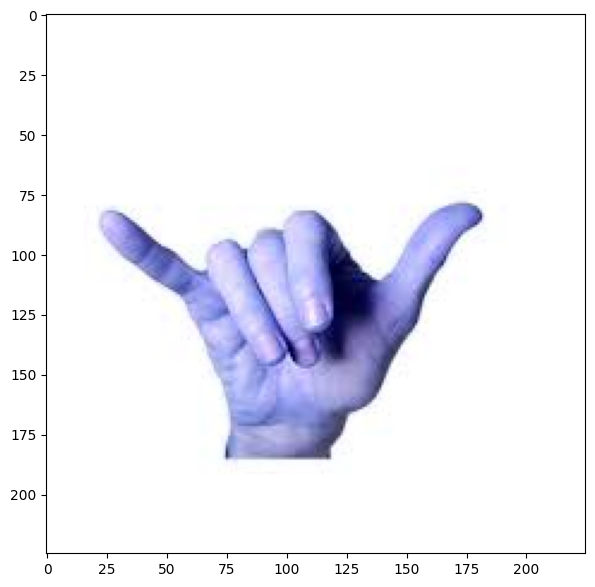

In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(7, 7))
plt.imshow(new_result_array)